#  Tugas Linear Regression
## Medical Cost Prediction

1. Mohammad Qori Aziz Hakiki (23222020)
2. La Ode Ansyarullah S. Sagala (23221066)

## 1. Problem Understanding

Pada insurance.csv, terdapat dataset mengenai Medical Cost. Dataset terdiri dari keterangan-keterangan mengenai responden seperti umur, jenis kelamin responden, indeks massa tubuh (BMI), apakah responden merokok atau tidak, daerah tinggal responden, dan terakhir adalah biaya medis yang dikenakan oleh asuransi kesehatan pada responden.

Masalah yang akan kita selesaikan adalah bagaimana memprediksi biaya medis yang akan dibebankan kepada seseorang dengan fitur tertentu. Kita perlu melatih model agar ditemukan bobot masing-masing fitur yang sesuai untuk memprediksi biaya medis. Akan kita lihat apakah dengan regresi linier saja cukup untuk menghadapi persoalan ini, jika tidak maka perlu dilakukan regresi polinomial.

## 2. Data Visualization and Preprocessing

Pada bagian ini akan dilakukan visualisasi dari dataset yang digunakan. Visualisasi data berguna untuk mengetahui karakter data, sehingga kita dapat memiliki gambaran apakah data perlu dinormalisasi atau perlakuan khusus lainnya. Normalisasi dan perlakuan ini disebut dengan *preprocessing*. *preprocessing* berfungsi agar kita dapat melatih model yang lebih baik.

### a. Import Dataset

In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### b. Pengecekan Missing Data

Pengecekan missing data akan mengecek pada seluruh baris kita, apakah ada data yang hilang atau tidak. Misalnya saja, dari 1000 baris data kita, kolom 'age' hanya memiliki 800 baris. Apabila terdapat missing data, kita perlu melakukan *drop* terhadap baris yang memiliki data hilang, atau membuat variabel *dummy* agar data *train* kita tidak berkurang.

In [3]:
# Pengecekan missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Dapat terlihat bahwa dataset kita tidak memiliki data yang hilang.

### c. Visualisasi Data Target

c:\Users\muham\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribusi Data Biaya Kesehatan')

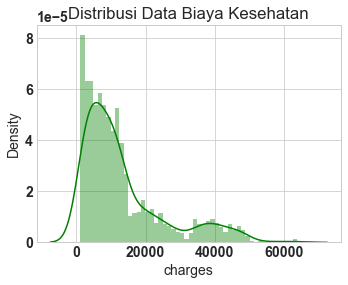

In [4]:
# Visualisasi data target
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='g',ax=ax)
ax.set_title('Distribusi Data Biaya Kesehatan')

Dapat terlihat bahwa dataset yang kita miliki tidak berbentuk distribusi normal gaussian ideal. Data yang kita miliki berbentuk *right-skewed*. Dalam metode statistik, seringkali kita perlu untuk mentransformasikan variabel dependen kita menjadi bentuk distribusi normal gaussian.

Namun, dari beberapa referensi, seperti pada link [ini](https://iovs.arvojournals.org/article.aspx?articleid=2128171), regresi linear tetap dapat memiliki hasil baik secara statistik pada sampel yang banyak.

Oleh karena itu, kita akan tetap menggunakan data awal tanpa transformasi ke distribusi normal.

### d. Encoding Data Kategori 

Untuk melakukan analisis pada data non numerik seperti *sex*, *region*, dan *smoker*, maka kita perlu mentransformasi data-data tersebut ke bentuk numerik. Hal ini disebut juga dengan *encoding*.

Data yang kita perlu lakukan *encoding* terkadang tidak hanya data non-numerik saja. Ada juga data numerik yang secara analitis perlu kita *encode*. Misalnya saja, saat kita memiliki data numerik jumlah pintu mobil vs harga mobil. Apakah memang mobil yang memiliki 2 pintu dibandingkan dengan mobil 4 pintu akan membuat harga mobil menjadi turun/naik? Pada kasus ini, kemungkinan kita perlu mengasumsikan pintu mobil adalah sebuah kategori tersendiri yang perlu kita *encode*.

Oleh karena itu, walaupun jumlah anak disini adalah data numerik, kita dapat tetap menganggapnya sebagai kategori dan melakukan *one hot encoding*. Dengan perintah get_dummies dari pandas, kita dapat langsung melakukan *encoding* terhadap dataframe kita.

Namun, di tugas kali ini kami menganggap jumlah anak adalah variabel non kategori, berbeda dengan referensi pada Kaggle.

In [5]:
# One hot encoding, add drop_first to drop unnecessary columns, such as smoker_no, or female, since they are dependent
from os import sep


df = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first =True, prefix = 'enc', prefix_sep = '_')
df.head()

,age,bmi,children,charges,enc_male,enc_yes,enc_northwest,enc_southeast,enc_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [6]:
# Reswap columns
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

df = swap_columns(df, 'charges', 'enc_southwest')
df.head()

,age,bmi,children,enc_southwest,enc_male,enc_yes,enc_northwest,enc_southeast,charges
0,19,27.900,0,1,0,1,0,0,16884.92400
1,18,33.770,1,0,1,0,0,1,1725.55230
2,28,33.000,3,0,1,0,0,1,4449.46200
3,33,22.705,0,0,1,0,1,0,21984.47061
4,32,28.880,0,0,1,0,1,0,3866.85520


### e. Visualisasi dan Pengecekan Plot Korelasi

Pada bagian ini akan dilakukan visualisasi *correlation plot*. *Correlation plot* berguna untuk menunjukkan korelasi-korelasi antar variabel. Apabila satu variabel x berkorelasi terhadap variabel lainnya, maka dapat dikatakan keduanya dependen satu sama lain. Kita menginginkan bahwa satu-satunya variabel dependen adalah target kita, yaitu *medical cost*, sedangkan variabel lainnya adalah variabel independen yang tidak bergantung satu sama lain.

<AxesSubplot:>

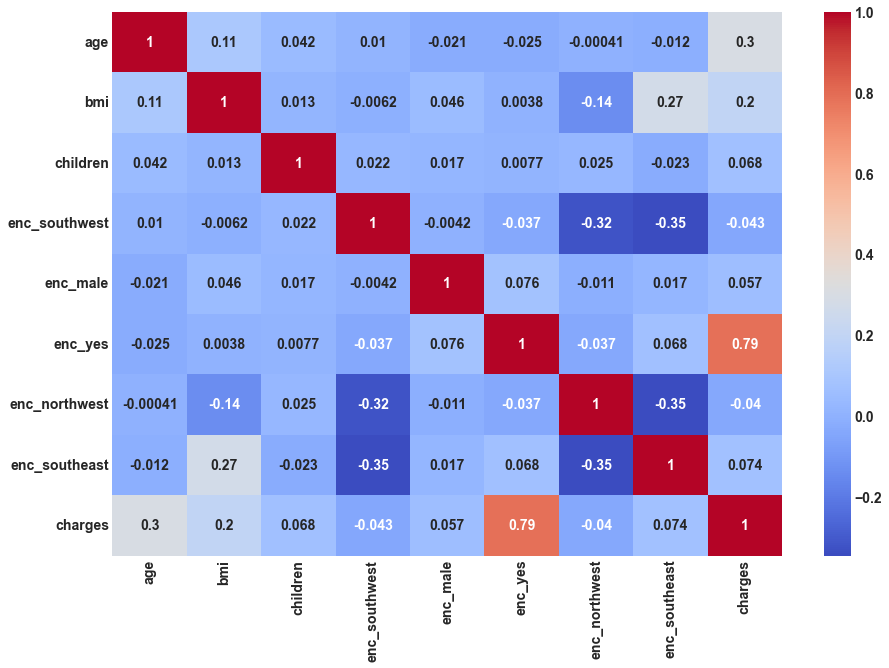

In [7]:
# Visualisasi correlation plot
correlation = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2g")

Dapat terlihat bahwa variabel kita sudah cukup independen satu sama lain.

### f. Visualisasi dan Normalisasi Variabel Independen

Pada langkah ini kita akan melakukan visualisasi variabel independen untuk melihat apakah data kita sudah normal atau belum.
Apabila data kita belum normal, maka perlu dilakukan normalisasi.

Kita memerlukan normalisasi karena algoritma *machine learning* secara umum akan mencapai konvergensi lebih cepat apabila variabel-variabel independennya berada di skala yang sama.

Pertama kita akan memvisualisasikan age, children, bmi dan charges. Hal ini karena kolom lainnya sudah kita lakukan *encoding* sehingga skalanya 0-1.

<AxesSubplot:ylabel='charges'>

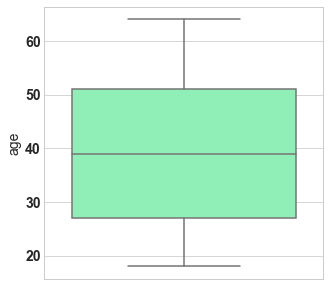

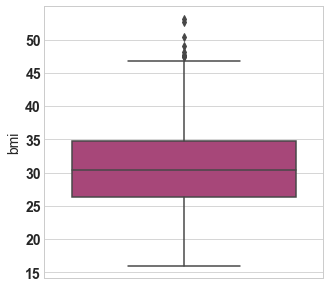

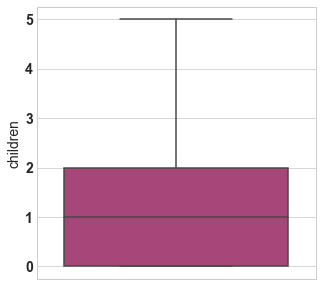

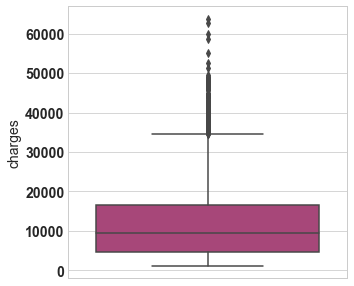

In [8]:
# Visualisasi boxplot dengan seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(5, 5))
sns.boxplot(data = df, y = 'age', palette="rainbow")
plt.figure(figsize=(5, 5))
sns.boxplot(data = df, y = 'bmi', palette="magma")
plt.figure(figsize=(5, 5))
sns.boxplot(data = df, y = 'children', palette="magma")
plt.figure(figsize=(5, 5))
sns.boxplot(data = df, y = 'charges', palette="magma")

Dapat terlihat bahwa data kita memiliki skala yang tidak normal. Oleh karena itu, akan kita lakukan *max min scaling* terhadap data umur, BMI, dan harga kita.

In [9]:
from sklearn import preprocessing


y = df['charges']
X = df.drop('charges', axis=1)
# Normalize the data
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X.values.reshape(-1, X.shape[1]))
y = min_max_scaler.fit_transform(y.values.reshape(-1, 1))

X = pd.DataFrame(X)
y = pd.DataFrame(y)
y.head()

,0
0,0.251611
1,0.009636
2,0.053115
3,0.333010
4,0.043816


In [10]:
X.head()

,0,1,2,3,4,5,6,7
0,0.021739,0.321227,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000000,0.479150,0.2,0.0,1.0,0.0,0.0,1.0
2,0.217391,0.458434,0.6,0.0,1.0,0.0,0.0,1.0
3,0.326087,0.181464,0.0,0.0,1.0,0.0,1.0,0.0
4,0.304348,0.347592,0.0,0.0,1.0,0.0,1.0,0.0


## 3. Linear Regression

Setelah kita mendapatkan pehamaman pada dataset kita dan sudah melakukan *preprocessing*, maka kita siap untuk melakukan *training* pada model. Tahapan ini kita bagi menjadi beberapa tahapan, yaitu:
 -  Splitting data training dan validation
 -  Training model regresi linear orde 1
 -  Evaluasi dan Validasi Model
 -  Kesimpulan

### a. Splitting data training dan validation / testing

Pada tahap ini kita akan melakukan splitting data. Rasio yang umum digunakan adalah 70/30, tapi untuk dataset yang berukuran kecil, 90/10 juga umum digunakan.

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into a training and a test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

print(f"Dimensi - X_train: {X_train.shape}, X_val: {X_val.shape}, y_train: {y_train.shape}, y_val: {y_val.shape}")

Dimensi - X_train: (936, 8), X_val: (402, 8), y_train: (936, 1), y_val: (402, 1)


### b. Training model regresi linear (orde 1)

Dengan menggunakan library scikit learn, kita tidak perlu mendefinisikan fungsi algoritma regresi linear. Kita cukup memanggil library LinearRegression() dan melakukan fit pada model.

In [12]:
# Gunakan library LinearRegression sklearn
from sklearn.linear_model import LinearRegression
model_orde1 = LinearRegression()
model_orde1.fit(X_train,y_train)

LinearRegression()

Dengan cukup 3 baris di atas, kita telah mendapatkan model regresi linear yang lengkap.

Berikutnya, kita akan mengeluarkan data koefisien masing-masing variabel untuk melakukan pengamatan terhadap korelasi tiap variabel output.

In [13]:
variable = ['bias'] + list(df.columns.values)
parameter_df = pd.DataFrame({'variable':variable})
# print(list(model_orde1.coef_))

coeff = model_orde1.coef_.flatten()
coeff = np.insert(coeff, 0, model_orde1.intercept_)
print(coeff.shape)
parameter_df = parameter_df.join(pd.Series(coeff, name='coefficient'))

parameter_df

(9,)


,variable,coefficient
0,bias,-0.047708
1,age,0.188289
2,bmi,0.198978
3,children,0.037727
4,enc_southwest,-0.012761
5,enc_male,-0.000759
6,enc_yes,0.374087
7,enc_northwest,-0.008969
8,enc_southeast,-0.015878
9,charges,NaN


### c. Evaluasi dan Validasi Model

Untuk melakukan evaluasi dan validasi model, kita akan menggunakan dataset validation yang telah kita split di atas.
Pertama-tama, kita akan mencari nilai harga terprediksi dari model. Kemudian, kita akan memvalidasi model dengan menghitung error antara target (harga sebenernya) dengan *predicted value*.

Ada beberapa cara yang dapat kita gunakan untuk membuat dan validasi model. Pada tugas ini, kita menggunakan pendekatan *Hold Out Validation*, terlihat dari splitting yang kita lakukan. Metode lainnya adalahnya K-Fold Cross Validation, Stratified K-Fold, LOOCV, dan lainnya.

In [14]:
# Cari y_pred
y_pred = model_orde1.predict(X_val)

# Hitung Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_val)

# Hitung R_square
r_square = model_orde1.score(X_val,y_val)

# Hitung maximum error
from sklearn.metrics import max_error
max_err = max_error(y_val, y_pred)
print('Mean Square Error pada validation set orde 1: ',mse)
print('R square model pada validation set orde 1:',r_square)
print('Error maksimum pada model orde 1 :',max_err)

Mean Square Error pada validation set orde 1:  0.008495247324899842
R square model pada validation set orde 1: 0.7909160991789904
Error maksimum pada model orde 1 : 0.3523714497516667


Text(0.5, 1.0, 'Pred vs Real in Linear Regression')

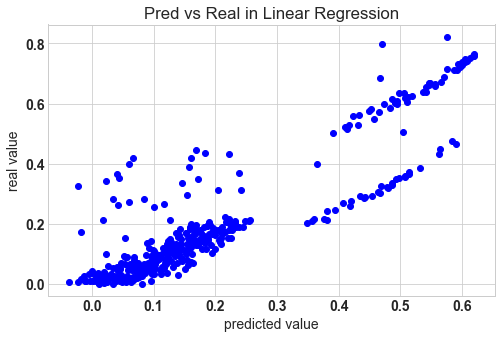

In [15]:
plt.scatter(y_pred, y_val, color = 'blue')
plt.xlabel("predicted value")
plt.ylabel("real value")
plt.title("Pred vs Real in Linear Regression")

Dapat terlihat bahwa visualisasi nilai terprediksi vs nilai sebenernya telah menghasilkan plot yang bisa dikatakan linear. Hal ini menandakan bahwa model regresi linear kita cukup bagus untuk melakukan prediksi dengan orde 1.

### d. Kesimpulan

Terlihat dari R square dan mean square error model orde 1 bahwa model kita memiliki performa yang cukup baik.
Ini disebabkan juga oleh preprocessing data yang telah kita lakukan, sehingga tiap data ternormalisasi.

Namun, selanjutnya dapat kita bandingkan dengan penggunaan orde 2, apakah performa model akan meningkat.

## 4. Linear Regression dengan Polinomial Orde 2

Dengan scikit learn, proses regresi polinomial hampir sama dengan regresi linear biasa.

Perbedaannya adalah, kita akan melakukan preprocessing terhadap data X awal menjadi X yang mengandung orde polinomial.
Preprocessing ini akan menjadikan dataset kita memiliki kolom tambahan yang memuat parameter awal yang sudah dipangkatkan (dalam hal ini pangkat 2)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_orde2 = poly.fit_transform(X_train)
X_orde2.shape

(936, 44)

In [17]:
from sklearn.linear_model import LinearRegression
model_orde2 = LinearRegression()
model_orde2.fit(X_orde2, y_train)

LinearRegression()

Selanjutnya, kita lakukan validasi pada model. Kita ukur MSE, R square dan error maksimum dari model polinomial kita.

In [18]:
# Cari y_pred
y_pred = model_orde2.predict(poly.fit_transform(X_val))

# Hitung Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_val)

# Hitung R_square
r_square = model_orde2.score(poly.fit_transform(X_val),y_val)

# Hitung maximum error
from sklearn.metrics import max_error
max_err = max_error(y_val, y_pred)
print('Mean Square Error pada validation set orde 2: ',mse)
print('R square model pada validation set orde 2:',r_square)
print('Error maksimum pada model orde 2 :',max_err)

Mean Square Error pada validation set orde 2:  0.00841987373367697
R square model pada validation set orde 2: 0.7927711840127862
Error maksimum pada model orde 2 : 0.3423360757793965


Text(0.5, 1.0, 'Pred vs Real in Polynomial Regression')

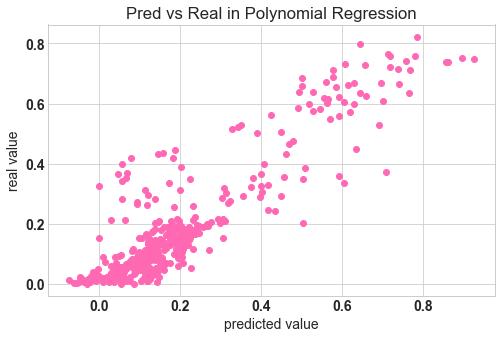

In [19]:
plt.scatter(y_pred, y_val, color = 'hotpink')
plt.xlabel("predicted value")
plt.ylabel("real value")
plt.title("Pred vs Real in Polynomial Regression")